In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import random
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from numba import jit
from tqdm import tqdm 
import time

In [2]:
class Particula():
    def __init__(self, r0, v0, a0, t, m, radius, Id):
        self.dt=t[1]-t[0]
        self.r=r0
        self.v=v0
        self.a=a0
        
        self.rVector=np.zeros((len(t),len(r0)))
        self.vVector=np.zeros((len(t),len(v0)))
        self.aVector=np.zeros((len(t),len(a0)))
        
        self.L=np.zeros(len(r0))
        self.m=m
        self.radius=radius
        self.Id=Id
        
        self.MomentumVector = np.zeros((len(t),len(v0)))
        
        self.EpVector = np.zeros((len(t),1))
        self.EkVector = np.zeros((len(t),1))
        
        self.Ep=0.
        self.Force=self.m*self.a
        self.G=4*np.pi**2
        
        
        self.rp=r0
        self.vp=v0
        
    def Evolution(self, i):
        
        self.SetPosition(i, self.r)
        self.SetVelocity(i, self.v)
        self.SetMomentum(i, self.m*self.v)
        
        #Energia
        
        self.SetEk(i, self.GetKEnergy())
        self.SetEp(i, self.GetU())
        
        self.a=self.Force/self.m
        
        if i == 0:
        #Método de Euler
            
            self.rp = self.r
            self.r = self.rp + self.dt * self.v
        
        else:
            
            self.rf = 2*self.r - self.rp + self.a * self.dt**2            
            self.v = ( self.rf - self.rp ) / (2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
        
    def RestoreForce(self):
        self.Force[:]=0.
        self.a[:]=0.
        self.Ep=0.
        
    def SetPosition(self, i, r):
        self.rVector[i]=r

    def SetVelocity(self, i, v):
        self.vVector[i]=v
    
    def SetMomentum(self, i, p):
        self.MomentumVector[i]=p
    
    def SetAngularMomentum(self, i, r, p):
        self.L[0] = r[1]*p[2] - r[2]*p[1]
        self.L[1] = -(r[0]*p[2] - r[2]*p[0])
        self.L[2] = r[0]*p[1] - r[1]*p[0]
        
        self.AngularMomentumVector[i] = self.L
        
    def SetEk(self, i, Ek):
        self.EkVector[i]=Ek
        
    def SetEp(self, i, Ep):
        self.EpVector[i]=Ep
        
    def SetForce(self,p):
        d = np.linalg.norm( self.r - p.GetPosition() )
        
        Fn = - self.G * self.m * p.m / d**3
        
        self.Force = np.add( self.Force, Fn* (self.r - p.GetPosition())  )
        
        self.Ep += - self.G * self.m * p.m / d
    
    def GetPosition(self):
        return self.r
    
    def GetPositionV(self):
        return self.rVector
    
    def GetReducePosition(self):
        return self.RrVector
        
    def GetVelocityV(self):
        return self.vVector    
    
    def GetMomentumVector(self):
        return self.MomentumVector
    
    def GetAngularMomentumVector(self):
        return self.AngularMomentumVector
        
    def GetReduceVelocity(self):
        return self.RvVector
     
    def GetKEnergy(self):
        return .5*self.m*np.linalg.norm(self.v)**2
    
    def GetU(self):
        return .5*self.Ep 
   
    def GetNetForce(self):
        return self.Force

    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]])
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
        self.RvVector = np.array([self.vVector[0]])
        
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])
        
    

In [3]:
def GetParticles(N,Limit,Dim=3):
    
    Particles = []
    G = 4*np.pi**2

    
    for i in range(N):
   
        r0 = np.array([0.,0.,0.])
        
        r=np.random.uniform(0.,5.,1)
        phi=np.random.uniform(0,2*np.pi,1)
        theta=np.random.uniform(0,np.pi,1)
        
        r0[0]=np.array([r*np.cos(theta)*np.sin(phi)])
        r0[1] = np.array([r*np.sin(theta)*np.sin(phi)])
        r0[2] = np.array([r*np.cos(phi)])
        
        v0 = np.array([0.,0.,0.])
        
        
        a0 = np.array([0.,0.,0.])
        
        p = Particula(r0,v0,a0,t,m,.3,i)
        
        Particles.append(p)
        
        
    return Particles

In [4]:
Limits = np.array([10.,10.,10.]) 

In [12]:
def RunSimulation(t, N = 100):
    
    Particles= GetParticles(N, Limits)
      
    for it in tqdm(range(len(t))):
        
        NetForce = np.array([0,0,0])
        
        for i in range(len(Particles)):    
            for j in range(len(Particles)):
                if i != j:
                    Particles[i].SetForce(Particles[j])
             
        for i in range(len(Particles_)):
            Particles[i].Evolution(it)
            Particles[i].RestoreForce()
        
    return Particles

In [6]:
dt= 0.001
m=0.01
t = np.arange(0.,2,dt)

In [7]:

Particulas =RunSimulation(t,100)

100%|██████████| 2000/2000 [04:08<00:00,  8.06it/s]


In [11]:
EnergiaK = Particulas[0].EkVector
EnergiaP = Particulas[0].EpVector
EnergiaTotal = Particulas[0].EkVector + Particulas[0].EpVector

for i in range(1,len(Particulas)):
    EnergiaK = np.add(EnergiaK, Particulas[i].EkVector)
    EnergiaP = np.add(EnergiaP, Particulas[i].EpVector)
    EnergiaTotal = np.add(EnergiaTotal, Particulas[i].EkVector + Particulas[i].EpVector) 

Momentum = Particulas[0].GetMomentumVector()

for i in range(1,len(Particulas)):
    Momentum = np.add(Momentum, Particulas[i].GetMomentumVector())

AngularMomentum=Particulas[0].GetAngularMomentumVector()
for i in range(1,len(Particulas)):
    AngularMomentum = np.add(AngularMomentum, Particulas[i].GetAngularMomentumVector())


    


AttributeError: 'Particula' object has no attribute 'AngularMomentumVector'

In [ ]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
ax2 = fig1.add_subplot(1,2,3)

ax1.plot(t,EnergiaTotal, label='Energía Total')
ax1.plot(t,EnergiaK,'--',label='Energía Cinética')
ax1.plot(t,EnergiaP,'--',label='Energía Potencial')
ax1.set_xlabel(r'$t[s]$',fontsize=10)
ax1.set_ylabel(r'$E$',fontsize=10)
ax1.legend(loc=0)


ax2.plot(t,Momentum[:,0], label='Momento en x')
ax2.plot(t,Momentum[:,1], label='Momento en y')
ax2.plot(t,Momentum[:,2], label='Momento en z')
ax2.set_xlabel(r'$px[]$',fontsize=10)
ax2.set_ylabel(r'$py[]$',fontsize=10)
ax2.legend(loc=0)
ax2.set_ylim(-0.1,0.1)


ax3.plot(t,AngularMomentum[:,0], label='Momento angular en x')
ax3.plot(t,AngularMomentum[:,1], label='Momento angular en y')
ax3.plot(t,AngularMomentum[:,2], label='Momento angular en z')
ax3.set_xlabel(r'$px[]$',fontsize=10)
ax3.set_ylabel(r'$py[]$',fontsize=10)
ax3.legend(loc=0)
ax3.set_ylim(-0.1,0.1)


plt.show()

<IPython.core.display.Javascript object>


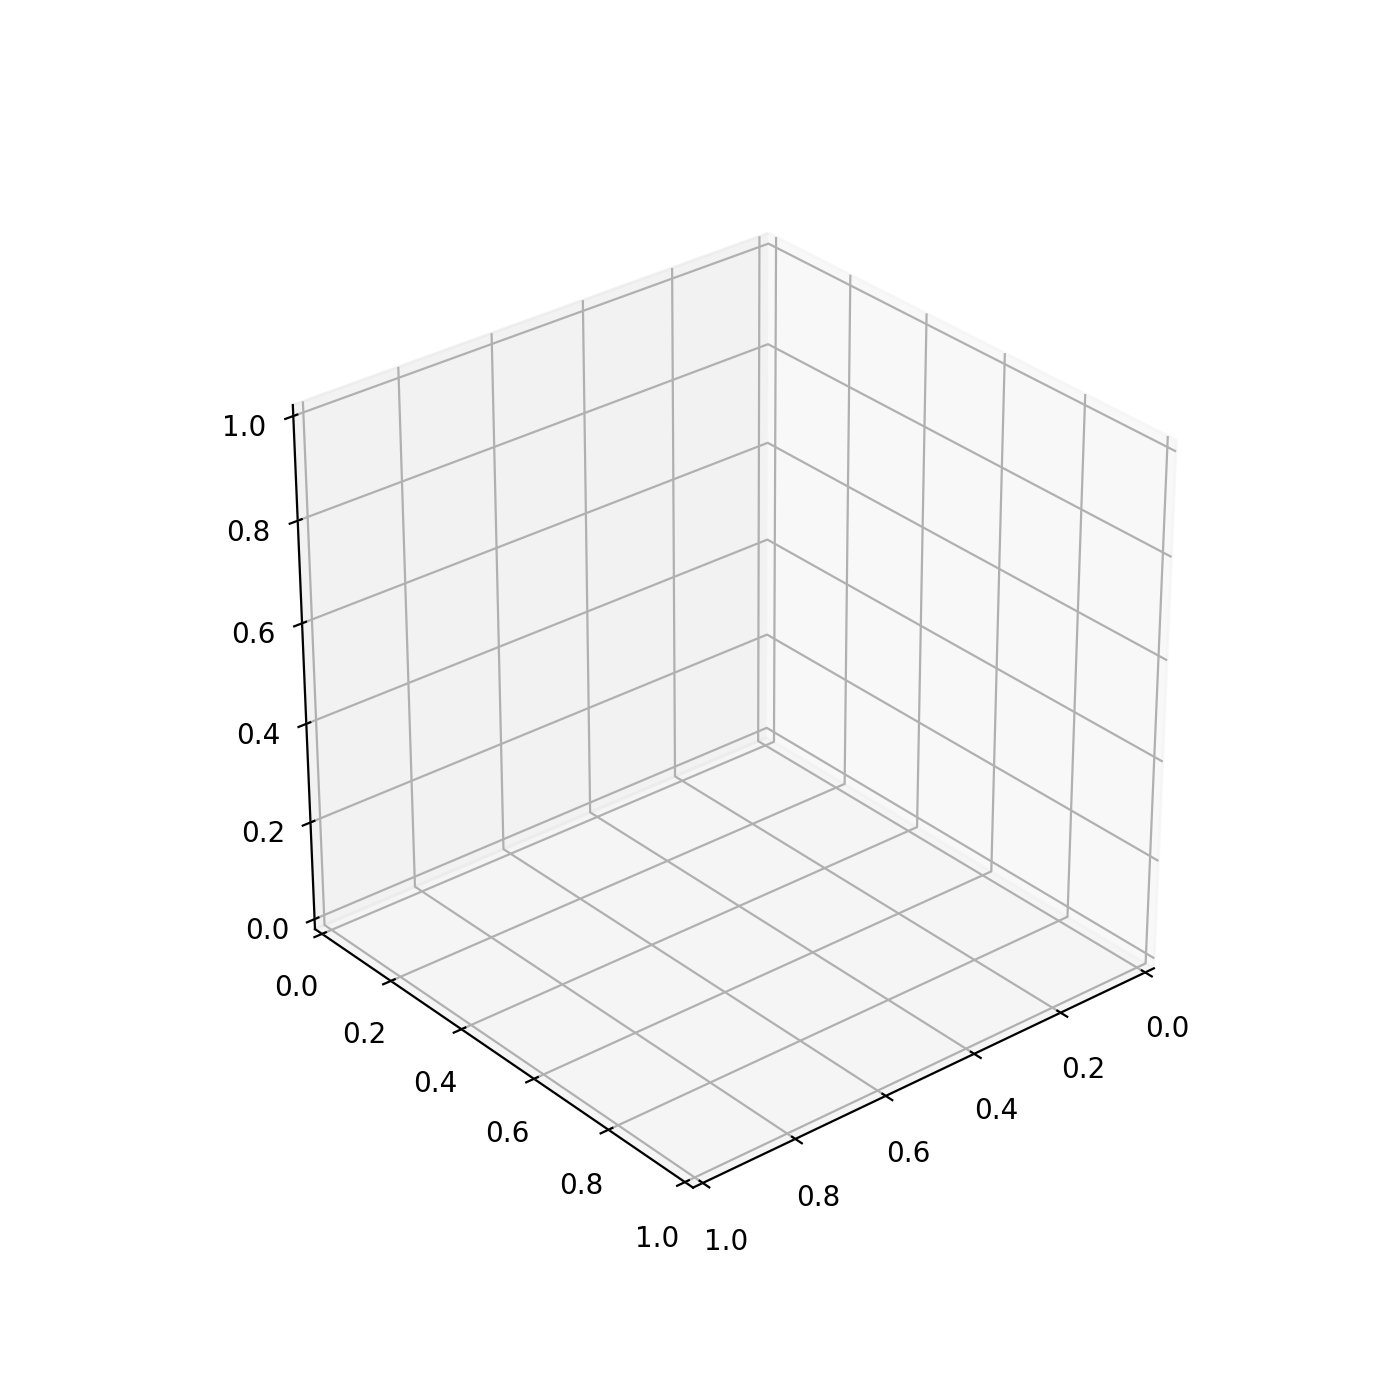

NameError: name 'redt' is not defined

In [14]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)
    
def init():
    ax.set_xlabel(r'$x[m]$',fontsize=15)
    ax.set_ylabel(r'$y[m]$',fontsize=15)
    ax.set_zlabel(r'$z[m]$',fontsize=15)
    ax.set_xlim(-Limits[0]-1,Limits[0]+1)
    ax.set_ylim(-Limits[1]-1,Limits[1]+1)
    ax.set_zlim(-Limits[2]-1,Limits[2]+1)

colors = ['y','b','r']    
sizes = [200,100,80]


def Update(i):
    
    plot = ax.clear()
    init()
    
    j = 0
    
    for p in Particulas:
        
        x = p.GetReducePosition()[i,0]
        y = p.GetReducePosition()[i,1]
        z = p.GetReducePosition()[i,2]
        
        vx = p.GetReduceVelocity()[i,0]
        vy = p.GetReduceVelocity()[i,1]
        vz = p.GetReduceVelocity()[i,2]
        
        plot = ax.set_title(r'$t=%.2f \ years$' %(redt[i]))
        
        plot = ax.scatter(x,y,z,marker='.',color=colors[j],s=sizes[j], label=Labels[j])
        
        plot = ax.quiver(x,y,z,vx,vy,vz,color=colors[j], length = 0.05, normalize=False)
        j += 1
        
     
   
    plot = ax.legend()
            
    return plot
    
Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)